In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats.qmc import LatinHypercube, scale, Sobol
import random

TODO

use numpy function for mandelbrot computation

save / show area in each iteration

heatmap minus true value

heatmap + table same data

torch

Different methods Linegraph

# **Question 1.1**

Final size estimation: 1.5114150047302246


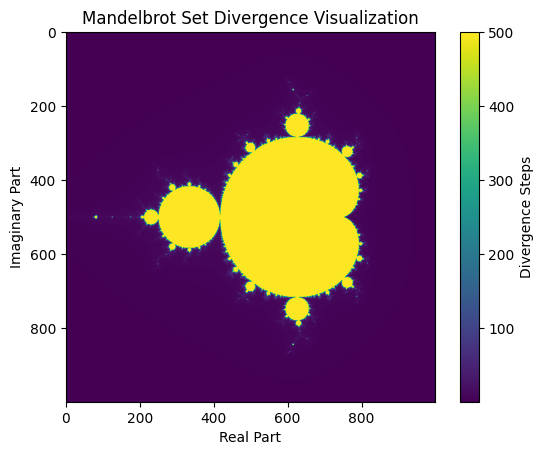

In [ ]:
def generate_complex_grid(resolution, real_range=(-2, 1), imag_range=(-1.5, 1.5)):
    """
    Generates a 2D grid of complex numbers based on the specified resolution and ranges.

    Parameters:
    - resolution: Number of points along each axis (int).
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.

    Returns:
    - C: 2D NumPy array of complex numbers.
    """
    rval = np.linspace(real_range[0], real_range[1], resolution).reshape(1, -1)
    ival = np.linspace(imag_range[0], imag_range[1], resolution).reshape(-1, 1)
    C = rval + 1.j * ival
    return C

def compute_mandelbrot(C, max_steps=100, bound=2, power=2, area_factor=9):
    """
    Computes the Mandelbrot set using the standard iteration method

    Parameters:
    - C: ndarray of complex numbers.
    - max_steps: Maximum number of iterations.
    - bound: Divergence threshold.
    - power: Power used in the Mandelbrot calculation.
    - area_factor: Factor for estimating the set area.

    Returns:
    - num_div_steps: 2D array of the number of steps before divergence.
    - area_at_step: list of the estimated area at each iteration.
    """
    Zi = C.copy()
    num_div_steps = np.zeros_like(C, dtype=np.int64)
    area_at_step = []
    for i in range(max_steps):
        Zi = np.power(Zi, power) + C
        num_div_steps += (np.abs(Zi) < bound)

        rel_area = np.sum(np.abs(Zi) < bound) / np.prod(C.shape)
        area_at_step.append(rel_area * area_factor)

    print(f"Final size estimation: {area_at_step[-1]}")

    return num_div_steps, np.array(area_at_step)

def compute_mandelbrot_torch(C, max_steps=100, bound=2, power=2, area_factor=9):
    """
    Computes the Mandelbrot set using the standard iteration method
    Uses pytorch methods instead of numpy for better scaling on multple processors / gpu

    Parameters:
    - C: ndarray of complex numbers.
    - max_steps: Maximum number of iterations.
    - bound: Divergence threshold.
    - power: Power used in the Mandelbrot calculation.
    - area_factor: Factor for estimating the set area.

    Returns:
    - num_div_steps: 2D array of the number of steps before divergence.
    - area_at_step: list of the estimated area at each iteration.
    """
    if not torch.is_tensor(C):
      C = torch.from_numpy(C)
    num_samples = C.numel()
    Zi = C.detach().clone()
    num_div_steps = torch.zeros_like(C, dtype=torch.int64)
    area_at_step = []
    for i in range(max_steps):
        Zi = torch.pow(Zi, power) + C
        num_div_steps += (torch.abs(Zi) < bound)

        rel_area = torch.sum(torch.abs(Zi) < bound) / num_samples
        area_at_step.append(rel_area * area_factor)

    print(f"Final size estimation: {area_at_step[-1]}")

    return num_div_steps, torch.tensor(area_at_step)

def plot_mandelbrot(num_div_steps, cmap='viridis'):
    """
    Plots the Mandelbrot set divergence steps.

    Parameters:
    - num_div_steps: 2D array of divergence step counts.
    - cmap: Colormap to use for the plot (default: 'viridis').
    """
    plt.imshow(num_div_steps, cmap=cmap)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.colorbar(label='Divergence Steps')
    plt.title('Mandelbrot Set Divergence Visualization')
    plt.show()

<ipython-input-31-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-31-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 7.3240110000000005


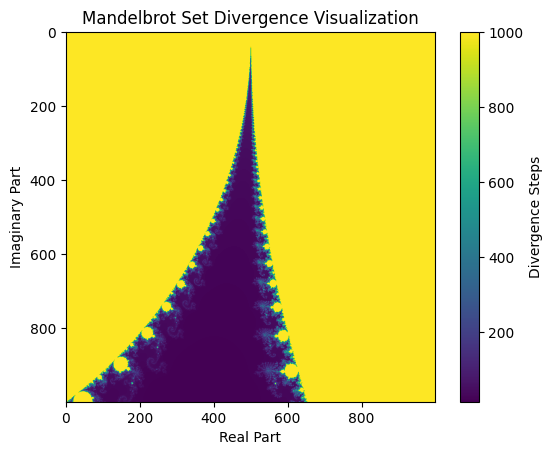

(-0.7, 0.3)

In [ ]:
# Modify these parameters for zooming
zoom_center = (-0.75, 0.1)  # Seahorse Valley
zoom_level = 0.1  # Smaller values for deeper zooms (e.g., 0.1, 0.01, 0.001)

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 1000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis')  # Change colormap for different aesthetics
(0.3, -0.05)
(-0.7, 0.3)

<ipython-input-31-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-31-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 6.245208


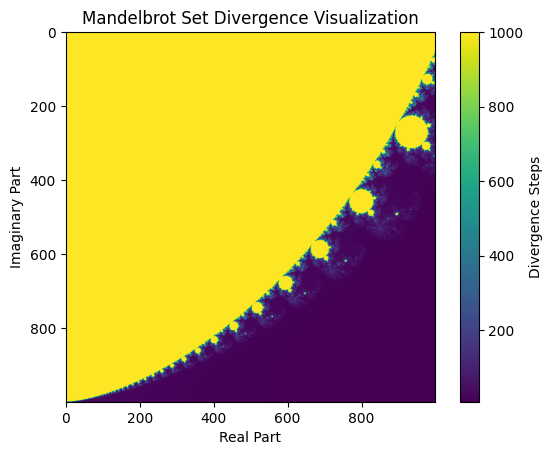

In [ ]:
# Modify these parameters for zooming
zoom_center = (0.3, -0.05) # Elephants Valley
zoom_level = 0.05  # Smaller values for deeper zooms (e.g., 0.1, 0.01, 0.001)

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 1000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis')  # Change colormap for different aesthetics



<ipython-input-31-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-31-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 3.4035435


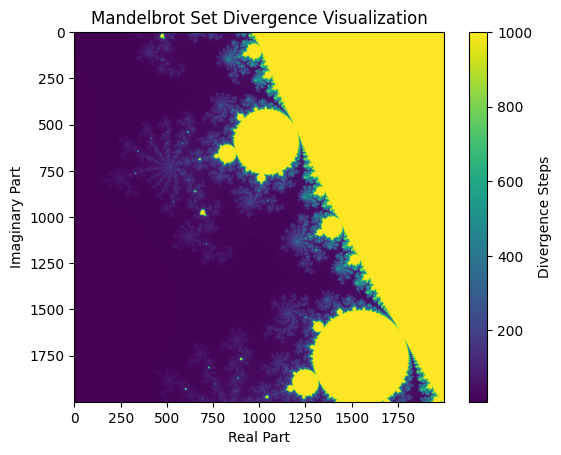

(-0.7, 0.3)

In [ ]:
# Modify these parameters for zooming
zoom_center = (-0.7, 0.3) # Spiral Region
zoom_level = 0.05  # Smaller values for deeper zooms (e.g., 0.1, 0.01, 0.001)

# Compute ranges for the zoomed-in area
real_range = (zoom_center[0] - zoom_level, zoom_center[0] + zoom_level)
imag_range = (zoom_center[1] - zoom_level, zoom_center[1] + zoom_level)

# Generate the grid with the new zoomed-in ranges
resolution = 2000
C = generate_complex_grid(resolution, real_range=real_range, imag_range=imag_range)

# Compute the Mandelbrot set with a high number of steps for detailed structure
num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=1000, bound=10)

# Plot the result
plot_mandelbrot(num_div_steps, cmap='viridis')  # Change colormap for different aesthetics

(-0.7, 0.3)

uniform random sampling from [-3,1][-2,2]

# **Question 1.2**

## *Line Plots*

Final size estimation: 1.2960000038146973
Final size estimation: 1.611199975013733
Final size estimation: 1.5185600519180298


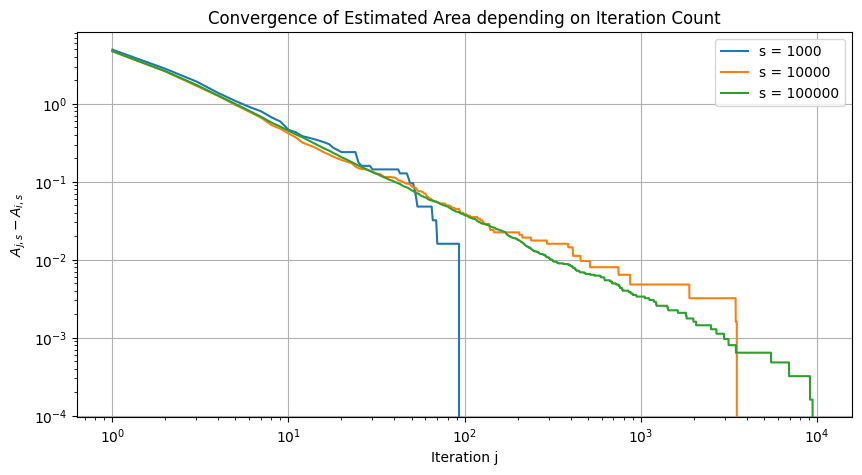

array([[6.25600004, 4.11199999, 3.23200011, ..., 1.296     , 1.296     ,
        1.296     ],
       [6.33760023, 4.21759987, 3.31520009, ..., 1.61119998, 1.61119998,
        1.61119998],
       [6.25135994, 4.14063978, 3.27040005, ..., 1.51856005, 1.51856005,
        1.51856005]])

In [ ]:
# no longer needed
def is_in_mandelbrot(c, max_iter):
    """
    Determines if a complex number is in the Mandelbrot set.

    Parameters:
    - c: Complex number.
    - max_iter: Maximum number of iterations to check.

    Returns:
    - Boolean indicating whether the point is in the Mandelbrot set.
    """
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return False
    return True

#no longer needed
def estimate_area_mandelbrot(num_samples, max_iter, real_range=(-3, 1), imag_range=(-2, 2)):
    """
    Estimates the area of the Mandelbrot set using Monte Carlo sampling.

    Parameters:
    - num_samples: Number of random samples.
    - max_iter: Maximum number of iterations for Mandelbrot check.
    - real_range: Range of real values (tuple).
    - imag_range: Range of imaginary values (tuple).

    Returns:
    - Estimated area of the Mandelbrot set.
    """
    real = np.random.uniform(real_range[0], real_range[1], num_samples)
    imag = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    complex_samples = real + 1j * imag

    in_set = np.array([is_in_mandelbrot(c, max_iter) for c in complex_samples])

    rect_area = (real_range[1] - real_range[0]) * (imag_range[1] - imag_range[0])
    area_estimate = np.mean(in_set) * rect_area
    return area_estimate

#moved up from later cell
def pure_random_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs pure random sampling for the Mandelbrot set.

    Parameters:
    - num_samples: Number of samples.
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    rval = np.random.uniform(real_range[0], real_range[1], num_samples)
    ival = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    return rval + 1.j * ival

def plot_mandelbrot_lineplots_faster(sample_sizes, iteration_count, skip_iterations=50):
    """
    Plots the convergence of Mandelbrot area estimates for different sample sizes.

    Parameters:
    - sample_sizes: List of sample sizes.
    - iteration_counts: List of maximum iteration counts.
    - skip_iterations: number of starting iterations to remove from the plot
    """
    area_estimates = np.zeros((len(sample_sizes), iteration_count))

    for i, num_samples in enumerate(sample_sizes):
        C = pure_random_sampling(num_samples, (-2,2),(-2,2))
        _, area_est = compute_mandelbrot_torch(C, iteration_count, area_factor=16 )
        area_estimates[i,:] = area_est

    plt.figure(figsize=(10, 5))
    for i, samples in enumerate(sample_sizes):
        plt.plot(np.arange(iteration_count)[skip_iterations:]+1, np.abs(area_estimates[i,-1] - area_estimates[i, skip_iterations:]), label=f's = {samples}')

    plt.xlabel('Iteration j')
    plt.ylabel(r'$A_{j, s} - A_{i, s}$')
    plt.title('Convergence of Estimated Area depending on Iteration Count')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.savefig('mandelbrot-convergence-iterations.png', dpi=600)
    plt.show()

    return area_estimates


#full chart as png already in overleaf

# Example usage
sample_sizes = [1000, 10000, 100000] #, 1000000]
iteration_counts = [50, 100, 200, 500, 1000]

#plot_mandelbrot_lineplots_faster(sample_sizes, 500000, skip_iterations=0)
plot_mandelbrot_lineplots_faster(sample_sizes, 10000, skip_iterations=0)


## *Heatmap*


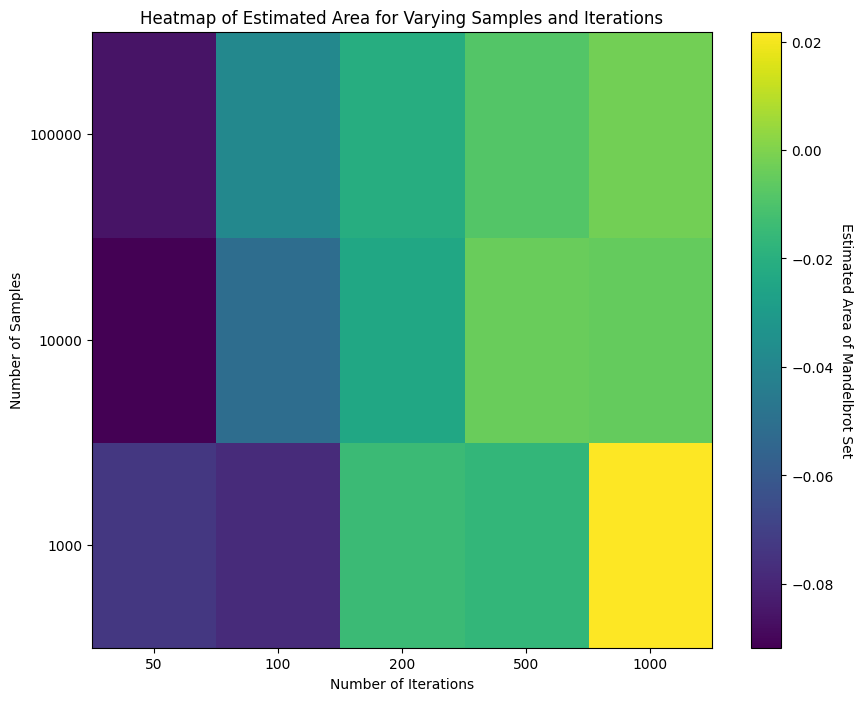

In [ ]:
literature_value = 1.5063

def compute_average_area_estimates(sample_sizes, iteration_counts, num_runs=50):
    """
    Computes the averaged area estimates for the Mandelbrot set over multiple runs.

    Parameters:
    - sample_sizes: List of sample sizes (lattice resolutions).
    - iteration_counts: List of maximum iteration counts.
    - num_runs: Number of runs to average the results (default: 50).

    Returns:
    - average_area_estimates: 2D NumPy array of averaged area estimates.
    """
    cumulative_area_estimates = np.zeros((len(sample_sizes), len(iteration_counts)))

    for _ in range(num_runs):
        area_estimates = np.zeros((len(sample_sizes), len(iteration_counts)))

        for i, samples in enumerate(sample_sizes):
            for j, iterations in enumerate(iteration_counts):
                area_estimates[i, j] = estimate_area_mandelbrot(samples, iterations)

        cumulative_area_estimates += area_estimates

    return cumulative_area_estimates / num_runs

def plot_mandelbrot_heatmap(average_area_estimates, sample_sizes, iteration_counts):
    """
    Plots a heatmap of the averaged Mandelbrot set area estimates.

    Parameters:
    - average_area_estimates: 2D NumPy array of averaged area estimates.
    - sample_sizes: List of sample sizes (lattice resolutions).
    - iteration_counts: List of maximum iteration counts.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(literature_value - average_area_estimates, cmap='viridis', origin='lower', aspect='auto')

    ax.set_xticks(np.arange(len(iteration_counts)))
    ax.set_yticks(np.arange(len(sample_sizes)))
    ax.set_xticklabels(iteration_counts)
    ax.set_yticklabels(sample_sizes)
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Number of Samples')

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Divergence of reference value', rotation=-90, va="bottom")

    plt.title('Heatmap of Estimated Area for Varying Samples and Iterations')
    plt.show()

# Example usage:
average_area_estimates = compute_average_area_estimates(sample_sizes, iteration_counts, num_runs=50)
plot_mandelbrot_heatmap(average_area_estimates, sample_sizes, iteration_counts)


## *DF Table*

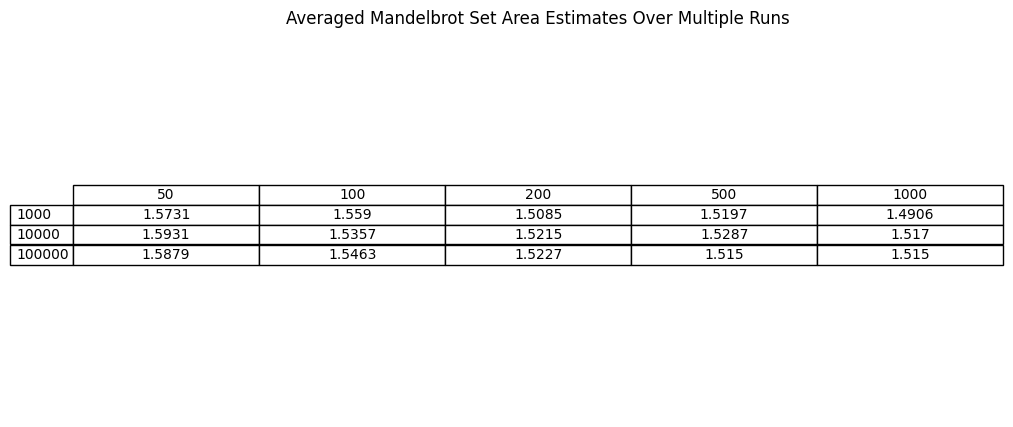

In [ ]:

def compute_average_area_estimates_df(sample_sizes, iteration_counts, num_runs=50):
    """
    Computes the averaged area estimates for the Mandelbrot set over multiple runs and returns a DataFrame.

    Parameters:
    - sample_sizes: List of sample sizes (lattice resolutions).
    - iteration_counts: List of maximum iteration counts.
    - num_runs: Number of runs to average the results (default: 50).

    Returns:
    - df: DataFrame containing the averaged area estimates.
    """
    average_area_estimates = compute_average_area_estimates(sample_sizes, iteration_counts, num_runs)

    df = pd.DataFrame(average_area_estimates, index=sample_sizes, columns=iteration_counts)
    df.index.name = 'Lattice resolution (N)'
    df.columns.name = 'Maximum iteration counts (S)'

    return df

def plot_area_estimates_table(df):
    """
    Plots a table of the averaged Mandelbrot set area estimates.

    Parameters:
    - df: DataFrame containing area estimates.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off')
    table = ax.table(cellText=df.round(4).values,
                     rowLabels=df.index,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.title('Averaged Mandelbrot Set Area Estimates Over Multiple Runs')
    plt.show()

# Example usage:
df = compute_average_area_estimates_df(sample_sizes, iteration_counts, num_runs=50)
plot_area_estimates_table(df)


## *3D-Surface Plot*

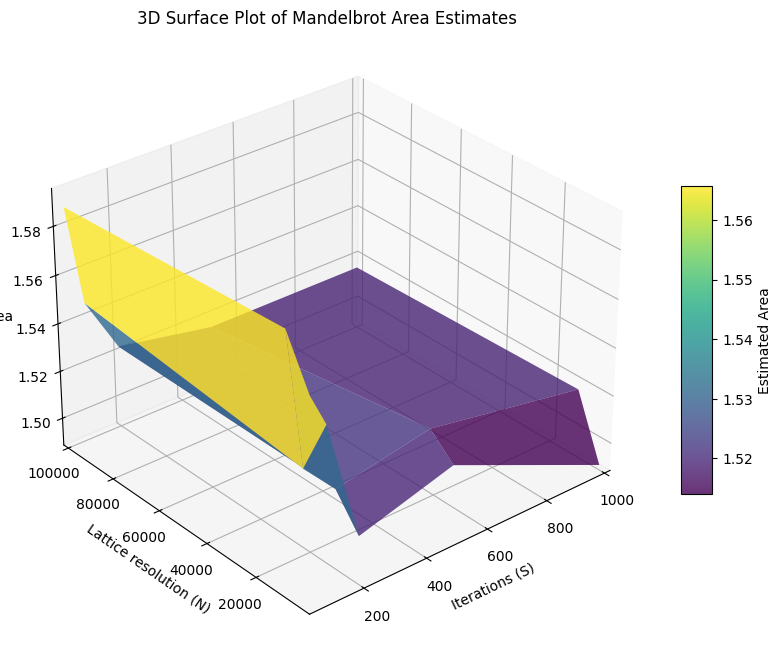

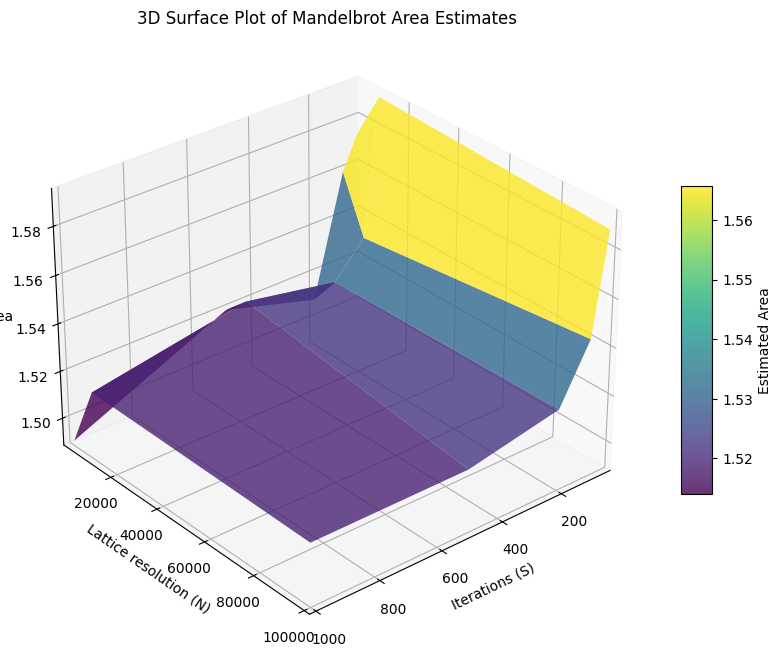

In [ ]:
# todo: flip either s or n

def plot_mandelbrot_3DSurfacePlot(df, flip=False):
    """
    Plots a 3D surface plot of Mandelbrot area estimates.

    Parameters:
    - df: DataFrame containing area estimates.
    - flip: Boolean indicating whether to flip the view by 180 degrees.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(df.columns, df.index)
    Z = np.abs(literature_value - df.values)
    X = X[::-1]

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Estimated Area')

    ax.set_xlabel('Iterations (S)')
    ax.set_ylabel('Lattice resolution (N)')
    ax.set_zlabel('Area')
    ax.set_title('3D Surface Plot of Mandelbrot Area Estimates')

    ax.set_xlim([df.columns.min(), df.columns.max()])
    ax.set_ylim([df.index.min(), df.index.max()])
    ax.set_zlim([Z.min(), Z.max()])

    if flip:
        ax.view_init(elev=30, azim=50)
    else:
        ax.view_init(elev=30, azim=230)

    plt.show()

# Example Usage:
plot_mandelbrot_3DSurfacePlot(df, flip=False)
plot_mandelbrot_3DSurfacePlot(df, flip=True)


# **Question 1.3**


## *Pure Random Sampling*

<ipython-input-4-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-4-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 1.50723


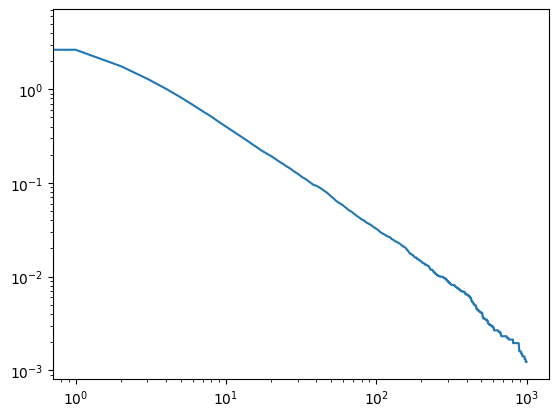

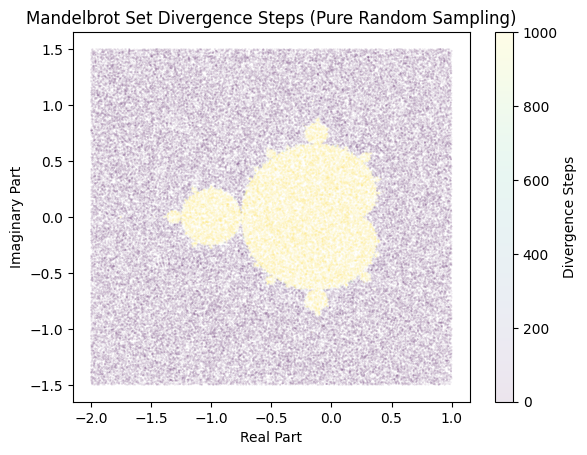

In [ ]:
def plot_sampling_method(C, title, max_steps=1000, area_factor=9):
    """
    Computes and plots Mandelbrot set divergence steps for a given complex array using a specified sampling method.

    Parameters:
    - C: 1D array of complex numbers representing the samples.
    - title: Title for the plot.
    - max_steps: Maximum number of iterations for Mandelbrot computation.
    - area_factor: Area factor for the computation.
    """
    num_div_steps, area_at_step = compute_mandelbrot(C, max_steps=max_steps, area_factor=area_factor)

    plt.plot(np.arange(max_steps), area_at_step - 1.506)
    plt.loglog()
    plt.show()

    rval, ival = C.real, C.imag
    plt.scatter(rval, ival, s=0.1, alpha=0.1, c=num_div_steps)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title(title)
    plt.colorbar(label='Divergence Steps')
    plt.show()

def pure_random_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs pure random sampling for the Mandelbrot set.

    Parameters:
    - num_samples: Number of samples.
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    rval = np.random.uniform(real_range[0], real_range[1], num_samples)
    ival = np.random.uniform(imag_range[0], imag_range[1], num_samples)
    return rval + 1.j * ival

# Example Usage
C = pure_random_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Pure Random Sampling)")

## *Orthogonal Sampling*

Adjusted num_samples to 99856 to ensure it is a perfect square close to the original value.


<ipython-input-4-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-4-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 1.5090430219516104


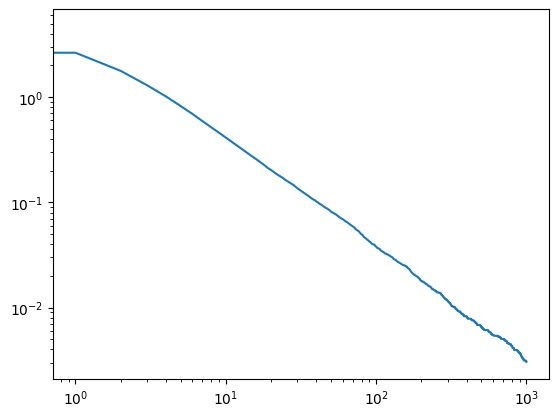

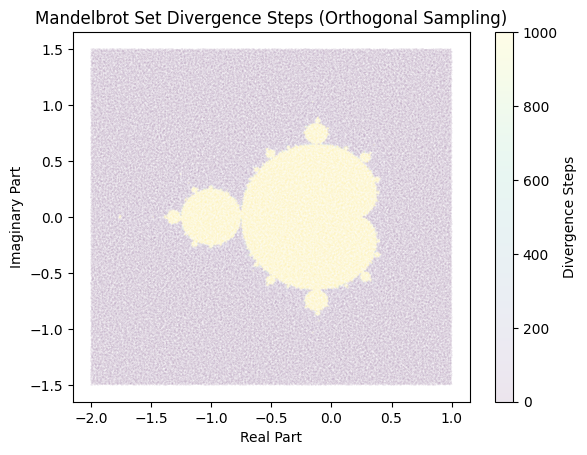

In [ ]:
def orthogonal_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs orthogonal sampling for the Mandelbrot set, suited for Python while following the logic of the provided C code.

    Parameters:
    - num_samples: Total number of samples to generate (must be a perfect square).
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    major = int(np.round(np.sqrt(num_samples)))
    num_samples = major * major
    print(f"Adjusted num_samples to {num_samples} to ensure it is a perfect square close to the original value.")

    x_indices = np.arange(major)
    y_indices = np.arange(major)

    samples = []
    for i in range(major):
        np.random.shuffle(x_indices)
        np.random.shuffle(y_indices)

        for j in range(major):
            rand_real = np.random.uniform(0, 1)
            rand_imag = np.random.uniform(0, 1)

            x = real_range[0] + (real_range[1] - real_range[0]) * ((i + rand_real) / major)
            y = imag_range[0] + (imag_range[1] - imag_range[0]) * ((j + rand_imag) / major)

            samples.append(complex(x, y))

    return np.array(samples)


# Example Usage
C = orthogonal_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Orthogonal Sampling)")


## *Latin HyperCube Sampling*

<ipython-input-4-a619b792eeac>:62: RuntimeWarning: overflow encountered in power
  Zi = np.power(Zi, power) + C
<ipython-input-4-a619b792eeac>:62: RuntimeWarning: invalid value encountered in power
  Zi = np.power(Zi, power) + C


Final size estimation: 1.5097500000000001


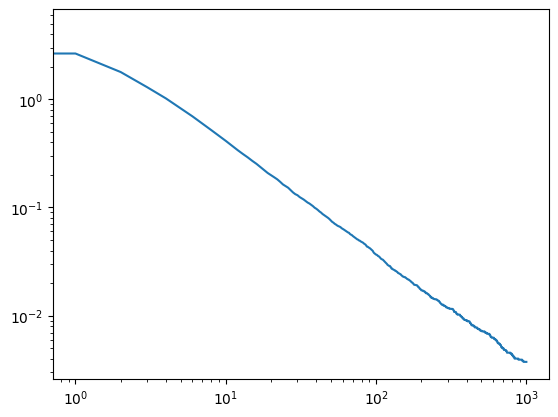

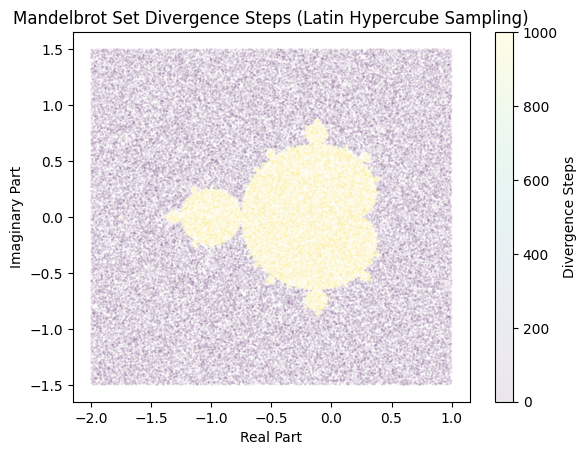

In [ ]:
def latin_hypercube_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=42):
    """
    Performs Latin Hypercube sampling for the Mandelbrot set.

    Parameters:
    - num_samples: Number of samples.
    - real_range: Tuple specifying the range for the real axis.
    - imag_range: Tuple specifying the range for the imaginary axis.
    - seed: Random seed for reproducibility.

    Returns:
    - C: 1D array of complex numbers representing the samples.
    """
    np.random.seed(seed)
    sampler = LatinHypercube(d=2)
    lhs_samples = sampler.random(n=num_samples)

    scaled_samples = scale(lhs_samples, [real_range[0], imag_range[0]], [real_range[1], imag_range[1]])
    rval, ival = scaled_samples[:, 0], scaled_samples[:, 1]
    return rval + 1.j * ival

# Example Usage
C = latin_hypercube_sampling(num_samples=100000)
plot_sampling_method(C, "Mandelbrot Set Divergence Steps (Latin Hypercube Sampling)")

# **Question 1.4**

0.09629999999999983
0.10084285714285723
0.21690499479708625
0.021005882352941097
0.08861116849580375
0.047788369730827895
0.025538205847016604
0.08913370148311772
0.008532142857142988
0.02067512223743395
0.039571719038816955
0.006635746386493446
0.02110839950253518
0.0001969258589511469
0.03797748411237145
0.0029644581695675853
0.0006690265486726243
0.0318799163179917
0.003798928276999236
0.015787483759203136
0.00033386470613328
0.008334000874116176
0.018803105985004454
0.006727139874739052
0.009220352526310593
0.028860504070943538
0.007947570914317081
0.007174198942031751
0.012848774173899846
0.0002849999999998687
[1.0263, 0.2714777777777777, 0.11499565217391305, 0.29762156862745104, 0.33255482625482613, 0.09856322188449851, 0.04826642685851312, 0.2057328922495274, 0.07772857142857137, 0.16310211019929666, 0.16064380776340115, 0.12516394756008742, 0.1460235800344234, 0.012687341772152028, 0.02700958318489488, 0.023986692869174542, 0.051222123893805316, 0.033448953974895446, 0.01138381

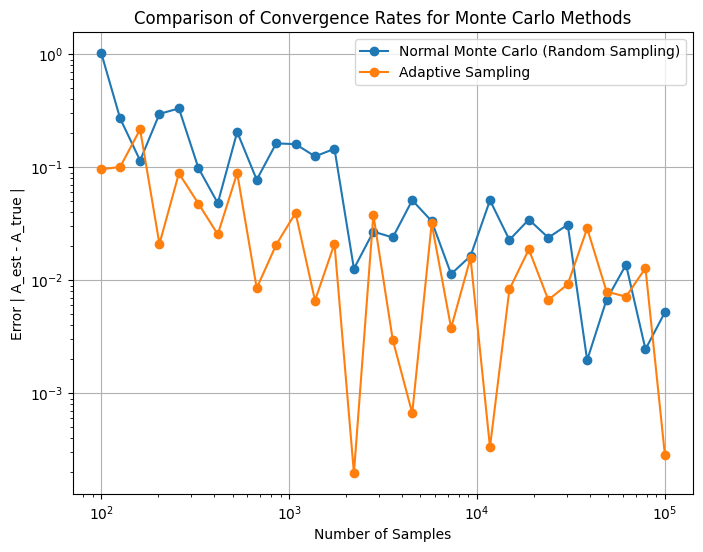

In [ ]:
true_area = 1.5063

# Refactored AdaptiveSampler class
class AdaptiveSampler:
    def __init__(self, num_samples, max_iter, real_range=(-2, 1), imag_range=(-1.5, 1.5),
                 seed=None, error_threshold=1e-4, max_iterations=10):
        self.num_samples = num_samples
        self.max_iter = max_iter
        self.real_range = real_range
        self.imag_range = imag_range
        self.seed = seed if seed is not None else random.randint(0, 10000)
        self.error_threshold = error_threshold
        self.max_iterations = max_iterations

        np.random.seed(self.seed)

        self.initial_grid_size = max(1, int(np.sqrt(self.num_samples)))
        self.initial_samples_per_region = max(1, self.num_samples // (self.initial_grid_size ** 2))
        self.regions = self.create_grid()

    class Region:
        def __init__(self, x_min, x_max, y_min, y_max):
            self.x_min = x_min
            self.x_max = x_max
            self.y_min = y_min
            self.y_max = y_max
            self.samples = []
            self.in_set_counts = []
            self.total_samples = 0
            self.local_area_estimate = 0
            self.local_variance = np.inf

        def sample(self, num_samples, max_iter):
            x_samples = np.random.uniform(self.x_min, self.x_max, num_samples)
            y_samples = np.random.uniform(self.y_min, self.y_max, num_samples)
            complex_samples = x_samples + 1j * y_samples
            in_set = np.array([is_in_mandelbrot(c, max_iter) for c in complex_samples])
            self.samples.extend(complex_samples)
            self.in_set_counts.extend(in_set)
            self.total_samples += num_samples
            area = (self.x_max - self.x_min) * (self.y_max - self.y_min)
            p = np.mean(self.in_set_counts)
            self.local_area_estimate = p * area
            if self.total_samples > 0:
                self.local_variance = (p * (1 - p) / self.total_samples) * area ** 2
            else:
                self.local_variance = np.inf

        def increase_sample_count(self, num_samples, max_iter):
            self.sample(num_samples, max_iter)

    def create_grid(self):
        x_min, x_max = self.real_range
        y_min, y_max = self.imag_range
        x_edges = np.linspace(x_min, x_max, self.initial_grid_size + 1)
        y_edges = np.linspace(y_min, y_max, self.initial_grid_size + 1)
        regions = []
        for i in range(self.initial_grid_size):
            for j in range(self.initial_grid_size):
                region = self.Region(x_edges[i], x_edges[i + 1], y_edges[j], y_edges[j + 1])
                regions.append(region)
        return regions

    def combine_region_estimates(self):
        total_area_estimate = sum(region.local_area_estimate for region in self.regions)
        return total_area_estimate

    def estimate_overall_variance(self):
        total_variance = sum(region.local_variance for region in self.regions)
        return total_variance

    def select_regions_with_high_variance(self, fraction=0.5):
        variances = np.array([region.local_variance for region in self.regions])
        threshold = np.percentile(variances, 100 * (1 - fraction))
        regions_to_refine = [region for region in self.regions if region.local_variance >= threshold]
        return regions_to_refine

    def run(self):
        for iteration in range(self.max_iterations):
            # Sample in each region
            for region in self.regions:
                if region.total_samples == 0:
                    samples_to_draw = self.initial_samples_per_region
                else:
                    samples_to_draw = max(1, self.initial_samples_per_region // (iteration + 1))
                region.sample(samples_to_draw, self.max_iter)
            # Combine estimates
            area_estimate = self.combine_region_estimates()
            # Estimate variance
            variance_estimate = self.estimate_overall_variance()
            # Check for convergence
            if variance_estimate < self.error_threshold:
                break
            # Select regions to refine
            regions_to_refine = self.select_regions_with_high_variance()
            if not regions_to_refine:
                break
            additional_samples = max(1, self.initial_samples_per_region // (iteration + 1))
            for region in regions_to_refine:
                region.increase_sample_count(additional_samples, self.max_iter)
        return area_estimate

def run_simulations(sample_sizes, max_iter=1000):
    """
    Runs simulations to compare the error between pure random sampling and adaptive sampling
    for estimating the area of the Mandelbrot set.

    Parameters:
    - sample_sizes: List of sample sizes to test for each simulation method.
    - max_iter: Maximum number of iterations for Mandelbrot set computation (default: 1000).

    Returns:
    - errors_random: List of errors from pure random sampling for each sample size.
    - errors_adaptive: List of errors from adaptive sampling for each sample size.
    """
    errors_random = []
    errors_adaptive = []
    errors_orthogonal = []

    for num_samples in sample_sizes:
        seed = random.randint(0, 10000)

        # Normal Monte Carlo (Random Sampling)
        C_random = pure_random_sampling(num_samples, seed=seed)
        area_random = estimate_area_mandelbrot(C_random, max_iter)
        error_random = abs(area_random - true_area)
        errors_random.append(error_random)

        # Orthogonal Sampling
        C_orthogonal = orthogonal_sampling(num_samples, real_range=(-2, 1), imag_range=(-1.5, 1.5), seed=seed)
        area_orthogonal = estimate_area_mandelbrot(C_orthogonal, max_iter)
        error_orthogonal = abs(area_orthogonal - true_area)
        errors_orthogonal.append(error_orthogonal)

        # Adaptive Sampling
        adaptive_sampler = AdaptiveSampler(num_samples, max_iter, seed=seed)
        area_adaptive = adaptive_sampler.run()
        error_adaptive = abs(area_adaptive - true_area)
        errors_adaptive.append(error_adaptive)

    return errors_random, errors_orthogonal, errors_adaptive

min_sample_size = 1000
max_sample_size = 1000000
sample_sizes = np.logspace(np.log10(min_sample_size), np.log10(max_sample_size), num=29).astype(int)

errors_random, errors_orthogonal, errors_adaptive = run_simulations(sample_sizes)

# Calculate mean and standard deviation
mean_orthogonal = np.mean(errors_orthogonal)
std_orthogonal = np.std(errors_orthogonal)
mean_adaptive = np.mean(errors_adaptive)
std_adaptive = np.std(errors_adaptive)

# Statistical comparison
t_stat, p_value = stats.ttest_ind(errors_orthogonal, errors_adaptive)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Print results
print("Statistical Summary:")
print(f"Orthogonal Sampling: Mean = {mean_orthogonal:.4f}, Std Dev = {std_orthogonal:.4f}")
print(f"Adaptive Sampling: Mean = {mean_adaptive:.4f}, Std Dev = {std_adaptive:.4f}")
print("\nT-tests Results:")
print(f"Orthogonal vs Adaptive: t-statistic = {t_stat:.4f}, p-value = {p_value:.4g}")

# Plotting results
plt.figure(figsize=(8, 6))
plt.loglog(sample_sizes, errors_adaptive, marker='o', label="Adaptive Sampling")
plt.loglog(sample_sizes, errors_orthogonal, marker='o', label="Orthogonal Sampling")
plt.xlabel('Number of Samples')
plt.ylabel('Error |A_est - A_true|')
plt.title('Comparison of Convergence Rates for Monte Carlo Methods')
plt.legend()
plt.grid(True)
plt.show()
